Import data, find top 10 records



In [62]:
import pandas as pd
import numpy as np

df = pd.read_csv('housing.csv')

df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
5,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,NEAR BAY
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,NEAR BAY
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,241400,NEAR BAY
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,226700,NEAR BAY
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,261100,NEAR BAY


--Check for missing values

In [10]:
df.apply(lambda x: sum(x.isnull()))

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

--Describe dataset

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [63]:
df.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

df.dropna(axis=0,inplace=True)

In [64]:
df.apply(lambda x: sum(x.isnull()))

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

<h3>-- Basic stats </h3>

--Frequency of items

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  int64  
 9   ocean_proximity     20433 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.7 MB


<h3>-- Data Visualization </h3>

-- Histogram

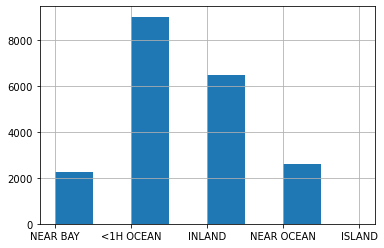

In [35]:
df['ocean_proximity'].hist(bins=8)

-- Box Plots

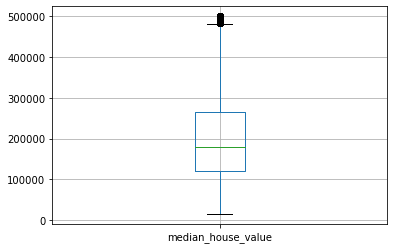

In [36]:
df.boxplot(column='median_house_value')

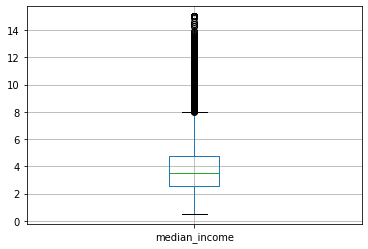

In [37]:
df.boxplot(column='median_income')

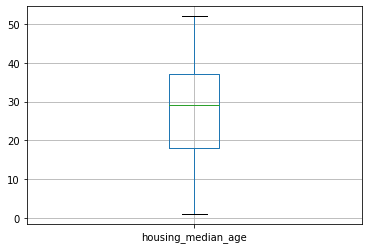

In [38]:
df.boxplot(column='housing_median_age')

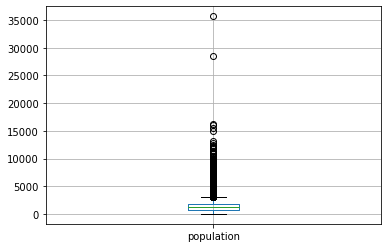

In [39]:
df.boxplot(column='population')

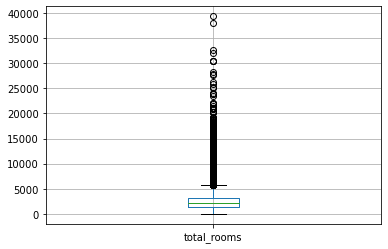

In [40]:
df.boxplot(column='total_rooms')

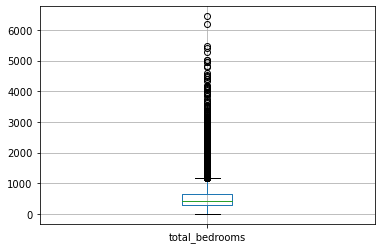

In [42]:
df.boxplot(column='total_bedrooms')

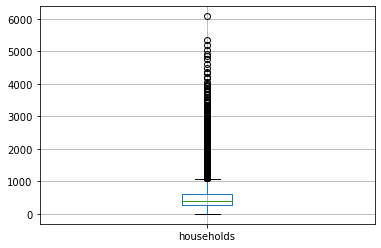

In [41]:
df.boxplot(column='households')

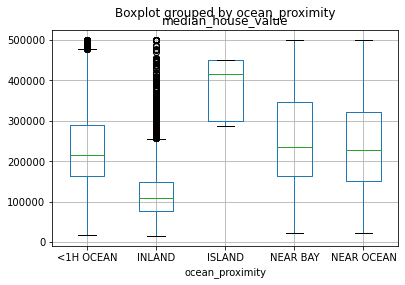

In [45]:
df.boxplot(column='median_house_value', by = 'ocean_proximity')

In [49]:
df.pivot_table(values='median_house_value',index='ocean_proximity')

,median_house_value
ocean_proximity,
<1H OCEAN,240267.990812
INLAND,124896.863147
ISLAND,380440.000000
NEAR BAY,259279.292070
NEAR OCEAN,249042.355023


--Set up independent variables, X

--Label encoding

In [65]:
#INLAND to 0, <1H OCEAN to 1, NEAR BAY to 2, NEAR OCEAN to 3, ISLAND to 4
df.ocean_proximity = df.ocean_proximity.map({'INLAND': 0,'<1H OCEAN': 1, 'NEAR BAY': 2, 'NEAR OCEAN': 3, 'ISLAND': 4})

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,2
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,2
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,2
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,2
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,2


In [66]:
X = pd.DataFrame(df.drop(['median_house_value'],axis=1))
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,2
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,2
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,2
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,2
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,2


In [105]:
#Set up dependent variable, Y 
Y = pd.Series(df.median_house_value, name = 'median_house_value')
Y.head()

0    452600
1    358500
2    352100
3    341300
4    342200
Name: median_house_value, dtype: int64

In [68]:
#Ordinary Least Squares Regression
import statsmodels.api as sm
X2 = sm.add_constant(X) 
ols = sm.OLS(Y, X2.astype(float))
lr = ols.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     4033.
Date:                Sat, 27 Mar 2021   Prob (F-statistic):               0.00
Time:                        03:08:02   Log-Likelihood:            -2.5673e+05
No. Observations:               20433   AIC:                         5.135e+05
Df Residuals:                   20423   BIC:                         5.136e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.974e+06   7.81

In [69]:
#Variable with smallest p value/ least significant variable
lr.pvalues.idxmax()

'households'

In [70]:
#P values for all variables
lr.pvalues

const                 1.938647e-306
longitude              0.000000e+00
latitude               0.000000e+00
housing_median_age    3.921011e-146
total_rooms            2.343949e-25
total_bedrooms         4.670952e-55
population            5.222709e-249
households             3.190927e-11
median_income          0.000000e+00
ocean_proximity        4.039822e-39
dtype: float64

In [71]:
#correlation matrix
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,-0.094779
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,-0.164294
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,0.211685
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,-0.026697
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,-0.003074
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,-0.027201
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,0.015710
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,0.150653
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,0.382332
ocean_proximity,-0.094779,-0.164294,0.211685,-0.026697,-0.003074,-0.027201,0.015710,0.150653,0.382332,1.000000


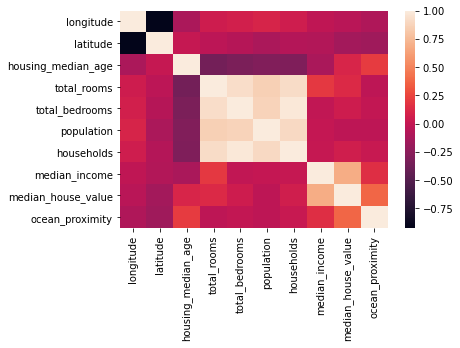

In [80]:
import seaborn as sns
ht = sns.heatmap(df.corr())

--Drop total_rooms, total_bedrooms, population, households, due to collinearity

In [104]:
X = pd.DataFrame(df.drop(['median_house_value','total_rooms','total_bedrooms','households'],axis=1))
X.head()

,longitude,latitude,housing_median_age,population,median_income,ocean_proximity
0,-122.23,37.88,41,322,8.3252,2
1,-122.22,37.86,21,2401,8.3014,2
2,-122.24,37.85,52,496,7.2574,2
3,-122.25,37.85,52,558,5.6431,2
4,-122.25,37.85,52,565,3.8462,2


In [106]:
#Ordinary Least Squares Regression
import statsmodels.api as sm
X2 = sm.add_constant(X) 
ols = sm.OLS(Y, X2.astype(float))
lr = ols.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     5110.
Date:                Sat, 27 Mar 2021   Prob (F-statistic):               0.00
Time:                        05:19:49   Log-Likelihood:            -2.5780e+05
No. Observations:               20433   AIC:                         5.156e+05
Df Residuals:                   20426   BIC:                         5.157e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.927e+06   8.02

In [107]:
#Variable with smallest p value/ least significant variable
lr.pvalues.idxmax()

'population'

In [108]:
#P values for all variables
lr.pvalues

const                 1.563783e-282
longitude             1.121199e-301
latitude               0.000000e+00
housing_median_age     9.121744e-87
population             2.204569e-01
median_income          0.000000e+00
ocean_proximity        1.825496e-68
dtype: float64

In [109]:
############################## Linear Regression ###################################
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [116]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=2,test_size=0.2)

In [117]:
params_dictionary = {
                        'fit_intercept' : [True, False],
                        'normalize': [False,True],
                        'copy_X': [True, False],
                        'n_jobs' : [-1, 1, 10]
                    }
grid = GridSearchCV(LinearRegression(),param_grid=params_dictionary,cv=4)

In [118]:
grid.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [-1, 1, 10],
                         'normalize': [False, True]})

In [119]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'normalize': True}
LinearRegression(n_jobs=-1, normalize=True)
0.6024156510190544


In [122]:
#k-fold crossvalidated test_score
from sklearn.model_selection import cross_val_score
a = cross_val_score(LinearRegression(n_jobs=-1, normalize=True),X_train,y_train,cv=4,scoring='r2').mean()

In [123]:
# Find testing R^2, adjusted R^2, MSE, RMSE
y_pred = grid.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error
import math

n = len(X)
k = len(X_test.iloc[0])
R2 = r2_score(y_test,y_pred)
Adj_R2 = 1 - ((n-1)*(1-R2)/(n-k-1))

print('The Cross Val score is: ', a) #Cross Val Score
print('The R^2 value is: ', r2_score(y_test,y_pred)) #R^2
print('The MSE value is: ',mean_squared_error(y_test,y_pred)) #MSE
print('The RMSE value is: ',math.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
print('The Adjusted R^2 value is: ',Adj_R2)  #Adjusted R^2

The Cross Val score is:  0.6024156510190544
The R^2 value is:  0.5876198048488319
The MSE value is:  5288382110.594326
The RMSE value is:  72721.26312567959
The Adjusted R^2 value is:  0.5874986709424916


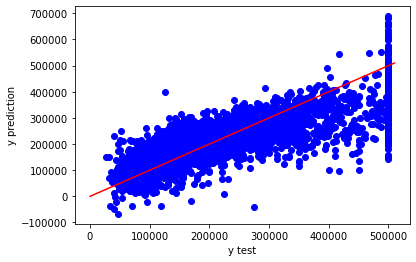

In [95]:
#plot diagonal line
import matplotlib.pyplot as plt
Y = [0,5.1*10**5]
z = [0,5.1*10**5]
plt.plot(Y,z,color='red')
y_pred = grid.predict(X_test)
plt.scatter(y_test,y_pred,color='blue')
plt.xlabel('y test')
plt.ylabel('y prediction')
plt.show()